In [7]:
# Import library yang diperlukan
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [8]:
# Membaca dataset yang akan digunakan
prov_data = pd.read_csv("Datasets/data_bps_metode_baru_2018.csv", index_col = 1)
populasi = pd.read_csv("Datasets/populasi2018-2020.csv", index_col = 0)

In [9]:
# Mengambil data untuk tahun 2018
prov2018 = prov_data[['AHH_2018', 'EYS_2018', 'MYS_2018', 'Pengeluaran_2018', 'IPM_2018']]
populasi2018 = populasi['2018']

# Menggabungkan data
data2018 = pd.concat([prov2018, populasi2018.rename('populasi_2018')], axis=1).reindex(prov2018.index)

# Mengisi bagian yang kosong
data2018.loc['KEPULAUAN RIAU', 'populasi_2018'] = populasi2018.loc['KEP. RIAU']
data2018.loc['D I YOGYAKARTA', 'populasi_2018'] = populasi2018.loc['DI YOGYAKARTA']

In [10]:
# Mengambil data yang dibutuhkan
ipm18 = data2018['IPM_2018'][0:34]
pengeluar18 = data2018['Pengeluaran_2018'][0:34]
pop18 = data2018['populasi_2018'][0:34]

# Mengubah tipe data
pengeluar18 = pengeluar18.str.replace(' ','').astype('float')
pop18 = pop18.str.replace(' ','').str.replace(',','.').astype('float')

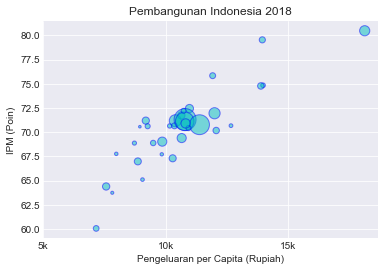

In [11]:
# Plotting data
plt.style.use('seaborn-dark')
plt.scatter(pengeluar18, ipm18, alpha=0.5, s = pop18/100, c='c', linewidths=1 ,edgecolor='b')

plt.title('Pembangunan Indonesia 2018')
plt.xlabel('Pengeluaran per Capita (Rupiah)')
plt.ylabel('IPM (Poin)')
plt.xticks([5000, 10000, 15000], ['5k', '10k', '15k'])
plt.grid()

# Menyimpan gambar plot
plt.savefig('ipmVSpengeluaran2018.png')

plt.show()